
## This notebook performs exploratory data analysis on the AI4I 2020 Predictive Maintenance Dataset to understand patterns and relationships that may predict machine failures.

**Sections:**
1. Setup & Data Loading
2. Data Overview
3. Univariate Analysis
4. Bivariate Analysis
5. Correlation Analysis
6. Key Findings


## 1. Setup & Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

RANDOM_STATE = 42

In [2]:
df = pd.read_csv('data/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df = pd.read_csv('data/ai4i2020.csv')
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset shape: 10000 rows, 14 columns


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Duplicate Rows: 0


In [7]:
print("Target Variable Distribution:")
print(df['Machine failure'].value_counts())
print(f"\nFailure Rate: {df['Machine failure'].mean()*100:.2f}%")

Target Variable Distribution:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Failure Rate: 3.39%


In [8]:
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_names = ['Tool Wear', 'Heat Dissipation', 'Power', 'Overstrain', 'Random']

print("Failure Type Breakdown:")
for col, name in zip(failure_cols, failure_names):
    count = df[col].sum()
    print(f"  {name} Failure: {count} ({count/len(df)*100:.2f}%)")

Failure Type Breakdown:
  Tool Wear Failure: 46 (0.46%)
  Heat Dissipation Failure: 115 (1.15%)
  Power Failure: 95 (0.95%)
  Overstrain Failure: 98 (0.98%)
  Random Failure: 19 (0.19%)


## 3. Univariate Analysis

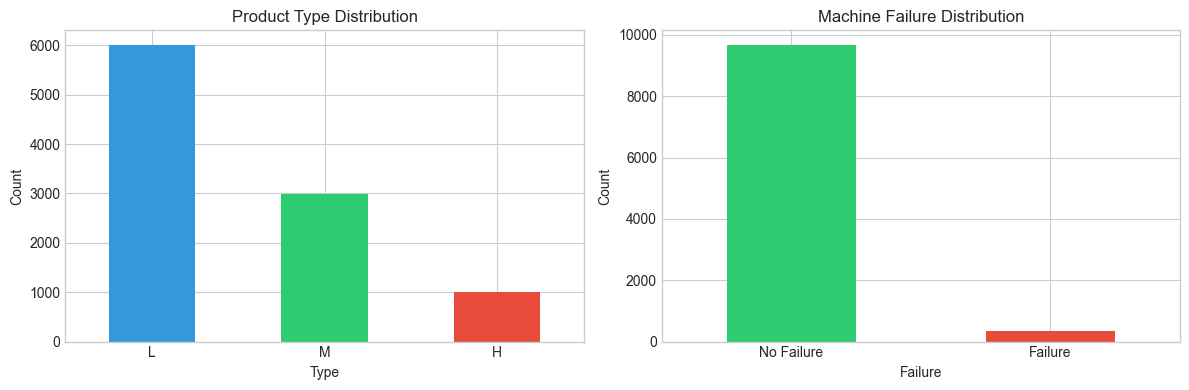

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df['Type'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Product Type Distribution')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

df['Machine failure'].value_counts().plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Machine Failure Distribution')
axes[1].set_xlabel('Failure')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['No Failure', 'Failure'], rotation=0)

plt.tight_layout()
plt.show()

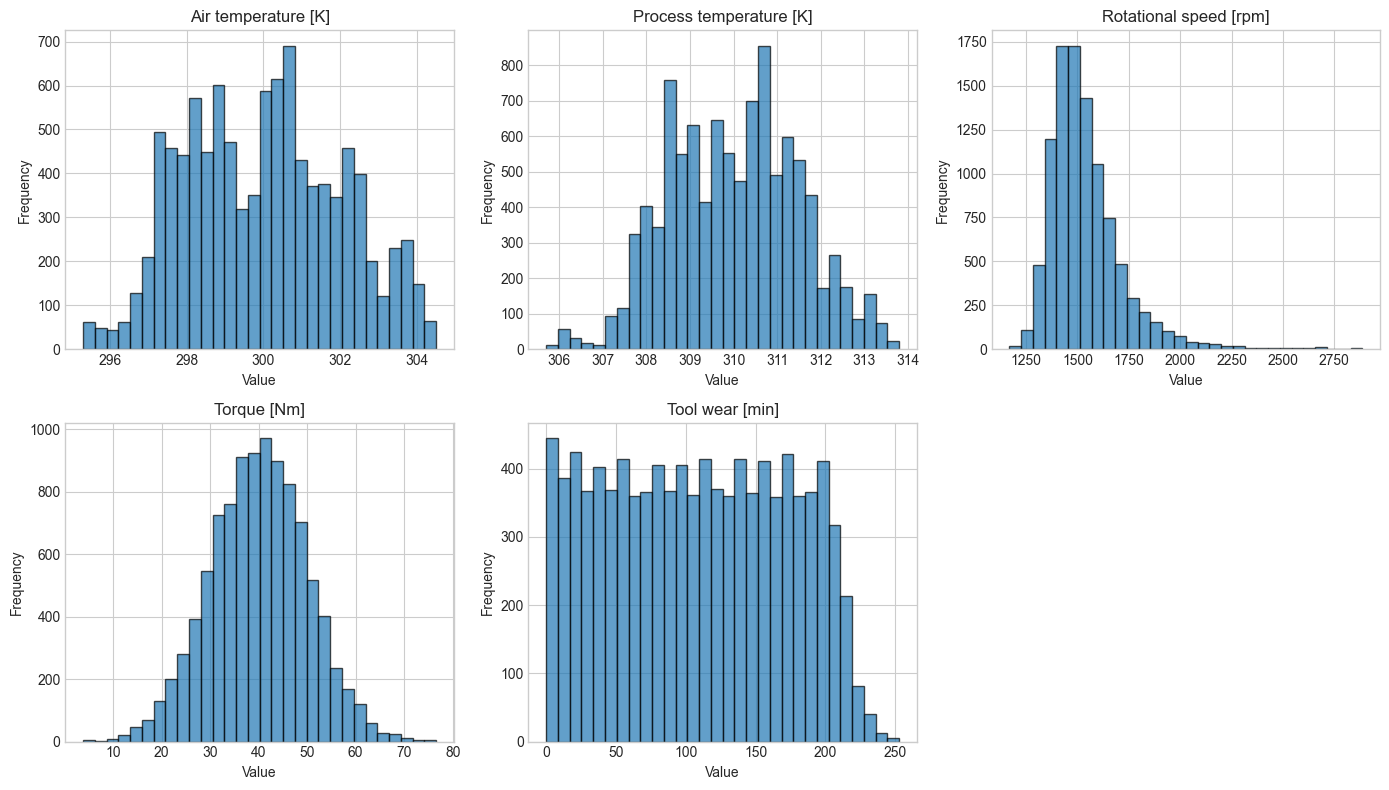

In [10]:
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

axes[5].axis('off')
plt.tight_layout()
plt.show()

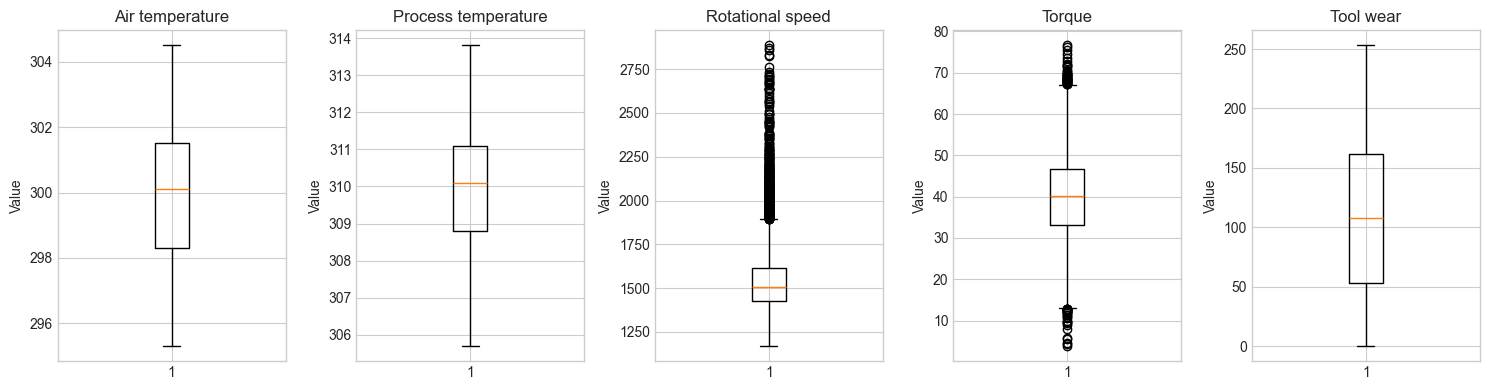

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(col.split('[')[0].strip())
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

## 4. Bivariate Analysis

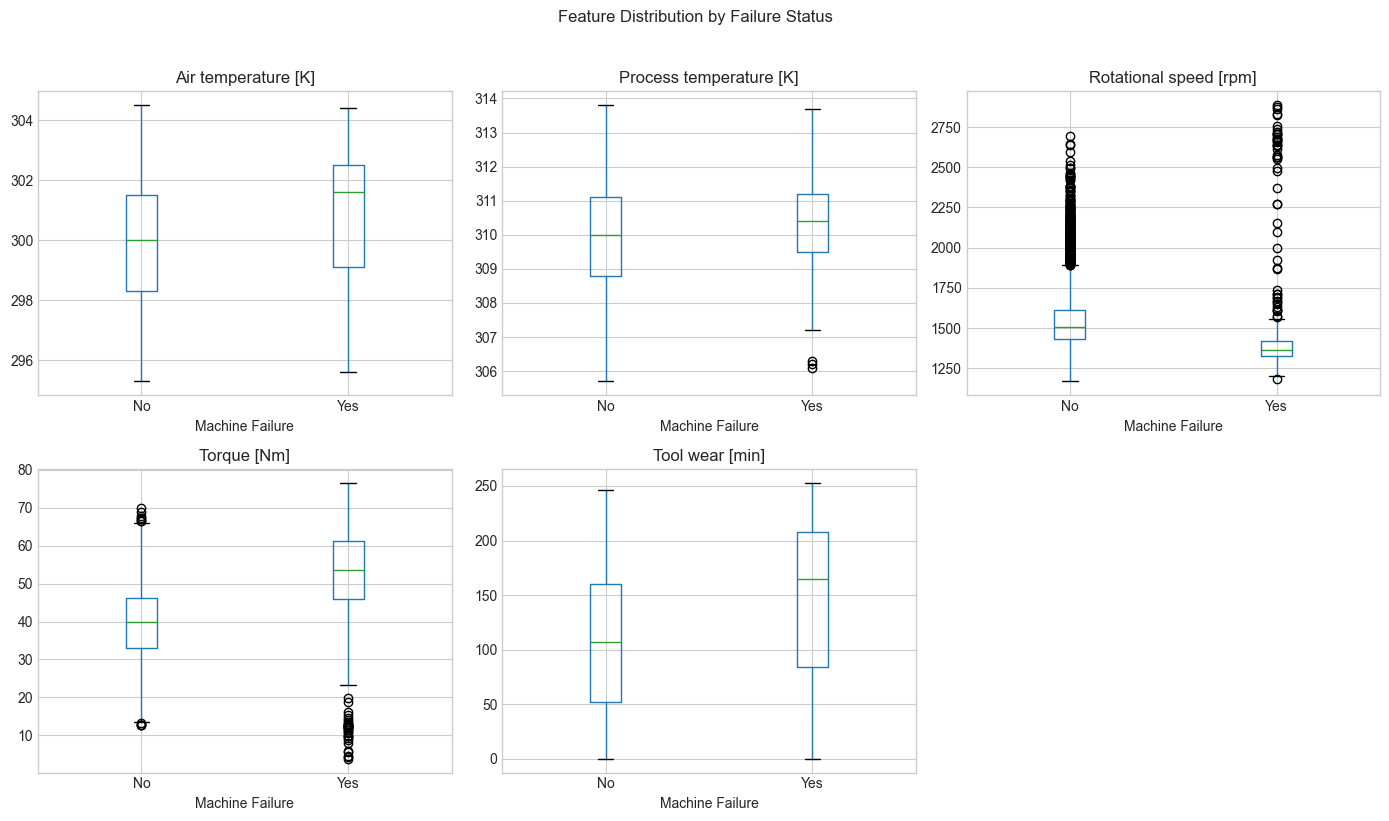

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='Machine failure', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Machine Failure')
    axes[i].set_xticklabels(['No', 'Yes'])

axes[5].axis('off')
plt.suptitle('Feature Distribution by Failure Status', y=1.02)
plt.tight_layout()
plt.show()

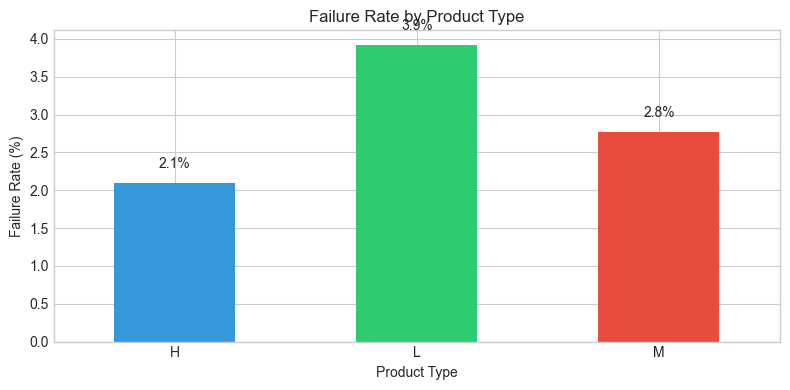

      sum  count      rate
Type                      
H      21   1003  2.093719
L     235   6000  3.916667
M      83   2997  2.769436


In [13]:
failure_by_type = df.groupby('Type')['Machine failure'].agg(['sum', 'count'])
failure_by_type['rate'] = failure_by_type['sum'] / failure_by_type['count'] * 100

fig, ax = plt.subplots(figsize=(8, 4))
failure_by_type['rate'].plot(kind='bar', ax=ax, color=['#3498db', '#2ecc71', '#e74c3c'])
ax.set_title('Failure Rate by Product Type')
ax.set_xlabel('Product Type')
ax.set_ylabel('Failure Rate (%)')
ax.tick_params(axis='x', rotation=0)

for i, v in enumerate(failure_by_type['rate']):
    ax.text(i, v + 0.2, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print(failure_by_type)

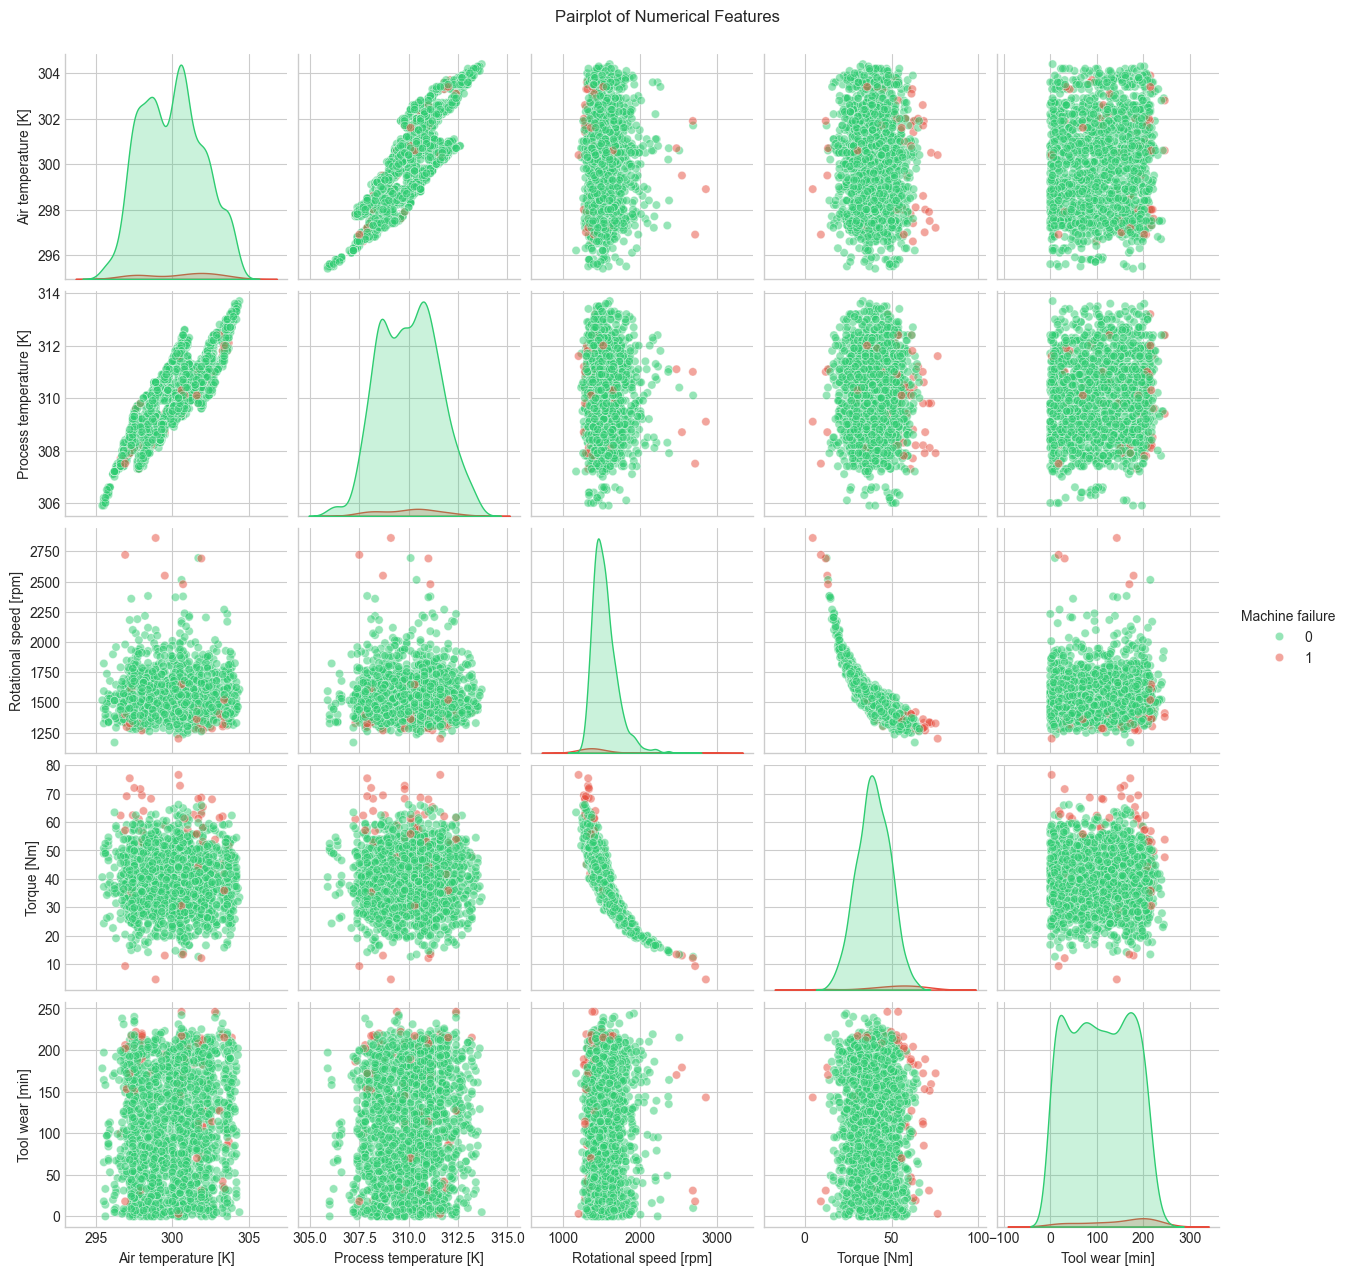

In [14]:
sample_df = df.sample(n=2000, random_state=RANDOM_STATE)
sns.pairplot(sample_df[numerical_cols + ['Machine failure']], 
             hue='Machine failure', 
             palette={0: '#2ecc71', 1: '#e74c3c'},
             diag_kind='kde',
             plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## 5. Correlation Analysis

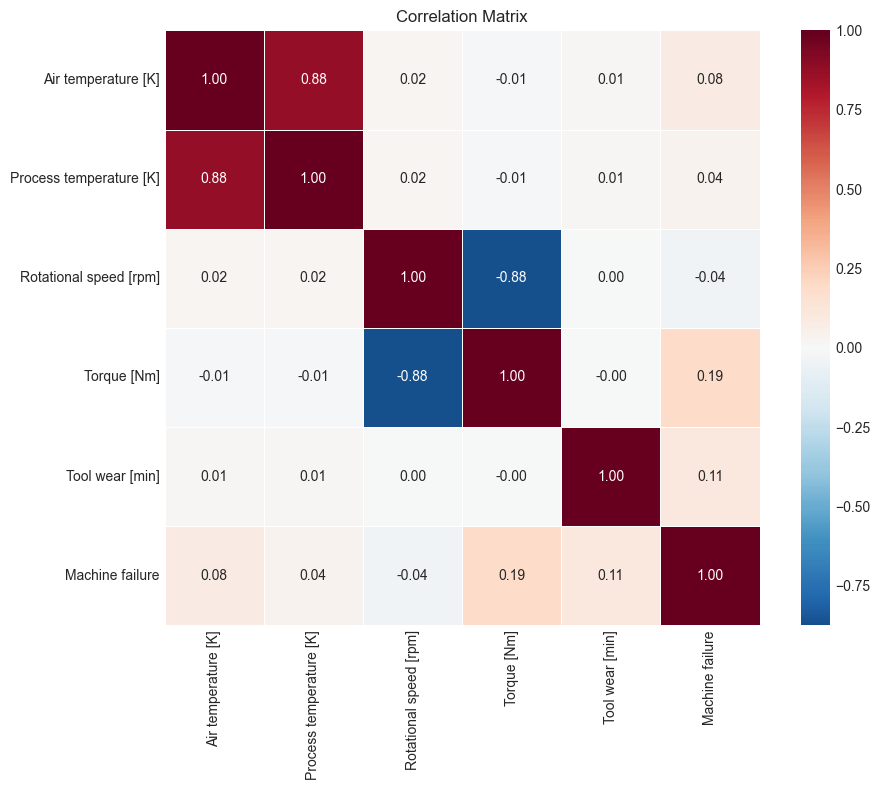

In [15]:
corr_cols = numerical_cols + ['Machine failure']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

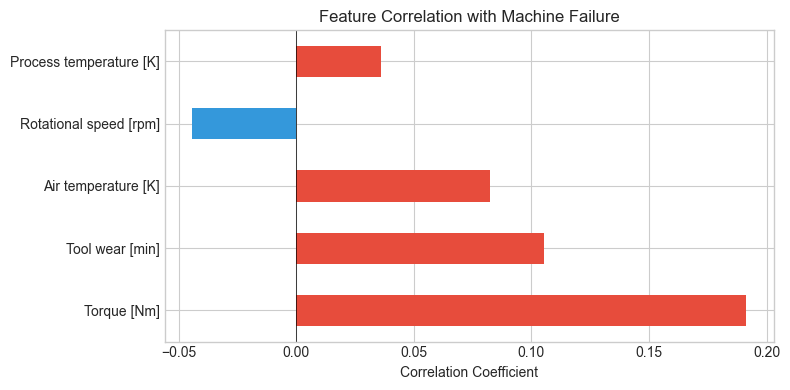

Correlation with Machine Failure:
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Rotational speed [rpm]    -0.044188
Process temperature [K]    0.035946
Name: Machine failure, dtype: float64


In [16]:
target_corr = df[corr_cols].corr()['Machine failure'].drop('Machine failure').sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 4))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_corr]
target_corr.plot(kind='barh', color=colors)
plt.title('Feature Correlation with Machine Failure')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Correlation with Machine Failure:")
print(target_corr)

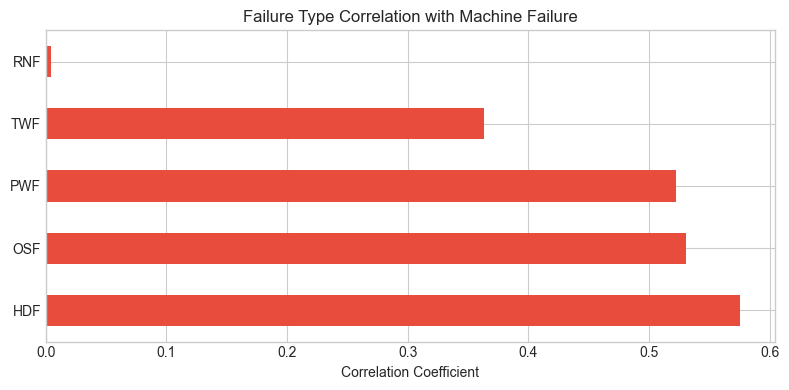

Failure Type Correlations:
  Tool Wear: 0.576
  Heat Dissipation: 0.531
  Power: 0.523
  Overstrain: 0.363
  Random: 0.005


In [17]:
failure_corr = df[failure_cols + ['Machine failure']].corr()['Machine failure'].drop('Machine failure').sort_values(ascending=False)

plt.figure(figsize=(8, 4))
failure_corr.plot(kind='barh', color='#e74c3c')
plt.title('Failure Type Correlation with Machine Failure')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Failure Type Correlations:")
for col, name, corr in zip(failure_cols, failure_names, failure_corr):
    print(f"  {name}: {corr:.3f}")

## 6. Key Findings

**Dataset Characteristics:**
- 10,000 samples with 14 features
- No missing values or duplicates
- Class imbalance: ~3% failure rate

**Feature Insights:**
- Torque shows strongest positive correlation with failure
- Rotational speed shows negative correlation with failure
- Higher torque + lower speed = higher failure probability
- Product Type H has highest failure rate

**Failure Types:**
- Heat Dissipation Failure (HDF) is most common
- Overstrain Failure (OSF) is second most common
- Multiple failure modes can occur simultaneously

**Recommendations for Modeling:**
- Handle class imbalance (use class weights or resampling)
- Focus on Torque, Rotational speed, and Tool wear as key features
- Consider feature engineering: Torque/Speed ratio
- Use stratified sampling for train/test split